In [7]:
# Import spectral power functions
from neurodsp.spectral import compute_spectrum, rotate_powerlaw

# Import utilities for loading and plotting data
from neurodsp.utils import create_times
from neurodsp.utils.download import load_ndsp_data
from neurodsp.plts.spectral import plot_power_spectra
from neurodsp.plts.time_series import plot_time_series
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
# Load the CSV file into a DataFrame
#eeg_data_sub_007 = pd.read_csv("Z:/somnotate/to_score_set/to_score_csv_files/sub-007_ses-01_recording-01_data-sleepscore_time-0-70.5h.csv")
eeg_data = pd.read_csv("Z:/somnotate/to_score_set/to_score_csv_files/sub-010_ses-01_recording-01_time-0-69h.csv")
#eeg_data_sub_011 = pd.read_csv("Z:/somnotate/to_score_set/to_score_csv_files/sub-011_ses-01_recording-01_time-0-72h.csv")
#eeg_data = pd.read_csv(input("Input file location of CSV of interest: "))

# Filter the data to extract only the EEG channels as NumPy arrays
# Assuming 'EEG1' or 'EEG2' is the column name
sig_eeg1 = eeg_data['EEG1'].values  # Extract as a NumPy ndarray
sig_eeg2 = eeg_data['EEG2'].values

# Set sampling rate, and create a times vector for plotting
fs = int(input("Sampling rate of signal in Hz: "))

In [38]:
start_time = input("Input in HH:MM start time of recording: ")

In [25]:
start_time_entire = input("Input in YYYY-MM-DD and HH:MM:SS the start time of recording: ")

In [6]:
# Duration in seconds of epochs for determining exponent
epoch_duration = 10


In [8]:
# Calculate total recording time in seconds and number of bins
recording_seconds = len(eeg_data) / fs  # Assuming all channels have the same length
num_bins = int(recording_seconds // epoch_duration)  # For the entirety of recording length

# Calculate number of samples per bin
samples_per_bin = fs * epoch_duration

# Prepare a dictionary to store PSD values and frequency data for each channel
psd_values_dict = {}
frequencies = None  # Frequencies are the same for each bin

# Define a small number (epsilon) to add
epsilon = 1e-10

# Loop over each EEG channel
for channel, sig in eeg_data.items():
    # Initialize a list to store PSD values for the current channel
    psd_values_dict[channel] = []

    # Loop over each bin
    for i in range(num_bins):
        # Extract the data for the current bin
        start = i * samples_per_bin
        end = start + samples_per_bin
        bin_data = sig[start:end]
        
        # Compute the power spectrum for this bin
        freqs, psd = compute_spectrum(bin_data, fs, method='welch', avg_type='mean', nperseg=fs*2)
        
        # Store the PSD values
        psd_values_dict[channel].append(psd)
        
        # Store frequencies once
        if frequencies is None:
            frequencies = freqs

# Convert psd_values to NumPy arrays for easier handling
for channel in psd_values_dict:
    psd_values_dict[channel] = np.array(psd_values_dict[channel])

In [9]:
psd_values_eeg1 = psd_values_dict['EEG1']
psd_values_eeg2 = psd_values_dict['EEG2']

In [10]:
from fooof import FOOOFGroup

# Initialize a FOOOFGroup object, specifying some parameters
fg_eeg1 = FOOOFGroup(peak_width_limits=[1.0, 8.0], max_n_peaks=6, min_peak_height=0.1,
           peak_threshold=2.0, aperiodic_mode='fixed')

# Fit FOOOF model across the matrix of power spectra
fg_eeg1.fit(freqs, psd_values_eeg1, [2, 40])

C:\Users\harrislab\AppData\Local\Temp\ipykernel_12644\2299107317.py:1: DeprecationWarning: 
The `fooof` package is being deprecated and replaced by the `specparam` (spectral parameterization) package.
This version of `fooof` (1.1) is fully functional, but will not be further updated.
New projects are recommended to update to using `specparam` (see Changelog for details).
  from fooof import FOOOFGroup


Running FOOOFGroup across 25072 power spectra.


In [12]:
# Initialize a FOOOFGroup object, specifying some parameters
fg_eeg2 = FOOOFGroup(peak_width_limits=[1.0, 8.0], max_n_peaks=6, min_peak_height=0.1,
           peak_threshold=2.0, aperiodic_mode='fixed')

# Fit FOOOF model across the matrix of power spectra
fg_eeg2.fit(freqs, psd_values_eeg2, [2, 40])

Running FOOOFGroup across 25072 power spectra.


In [11]:
fg_eeg1.print_results()

                                                                                                  
                                       FOOOF - GROUP RESULTS                                      
                                                                                                  
                           Number of power spectra in the Group: 25072                            
                                                                                                  
                        The model was run on the frequency range 2 - 40 Hz                        
                                 Frequency Resolution is 0.50 Hz                                  
                                                                                                  
                              Power spectra were fit without a knee.                              
                                                                                                  
          

In [13]:
fg_eeg2.print_results()

                                                                                                  
                                       FOOOF - GROUP RESULTS                                      
                                                                                                  
                           Number of power spectra in the Group: 25072                            
                                                                                                  
                        The model was run on the frequency range 2 - 40 Hz                        
                                 Frequency Resolution is 0.50 Hz                                  
                                                                                                  
                              Power spectra were fit without a knee.                              
                                                                                                  
          

C:\Users\harrislab\AppData\Local\Temp\ipykernel_16184\3556074443.py:15: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust the figure layout, leaving space at the top for the title


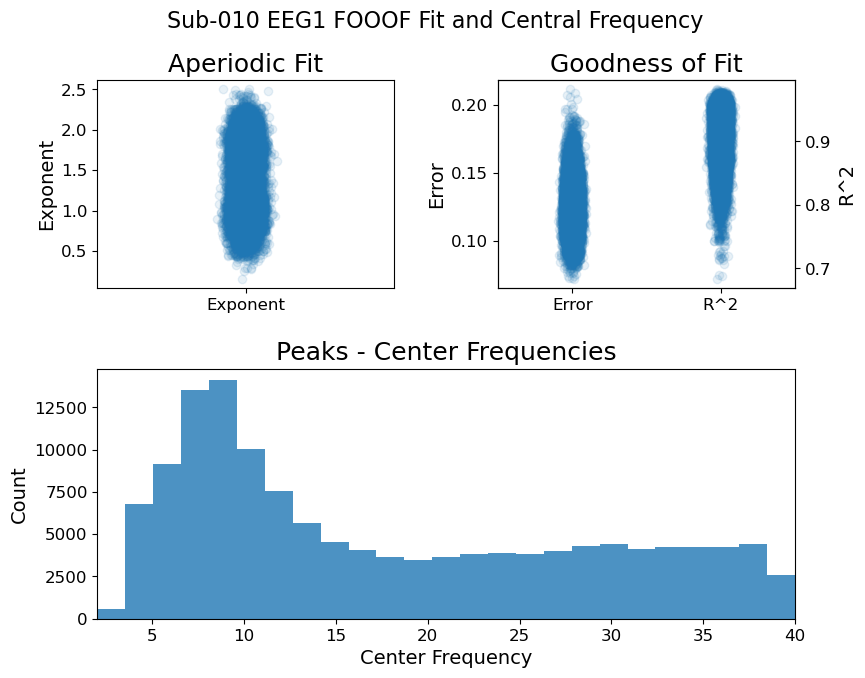

In [ ]:
# Plot using FOOOF
fg_eeg1.plot(
    save_fig=False,  # Don't save yet
    file_name='sub-010_fit_and_cf_0-69h_somno_eeg1.png',
    file_path='Z:/volkan/fooof/figures/goodness_of_fit_and_cf'
)

# Get the current figure and add the title at the top
fig = plt.gcf()  # Get the current figure
fig.suptitle('Sub-010 EEG1 FOOOF Fit and Central Frequency', fontsize=16, )  # Add a title above the subplots

# Adjust layout to make room for the title
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust the figure layout, leaving space at the top for the title

# Save the figure
plt.savefig('Z:/volkan/fooof/figures/goodness_of_fit_and_cf/sub-010_fit_and_cf_0-69h_somno_eeg1.png')


C:\Users\harrislab\AppData\Local\Temp\ipykernel_16184\657033783.py:15: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust the figure layout, leaving space at the top for the title


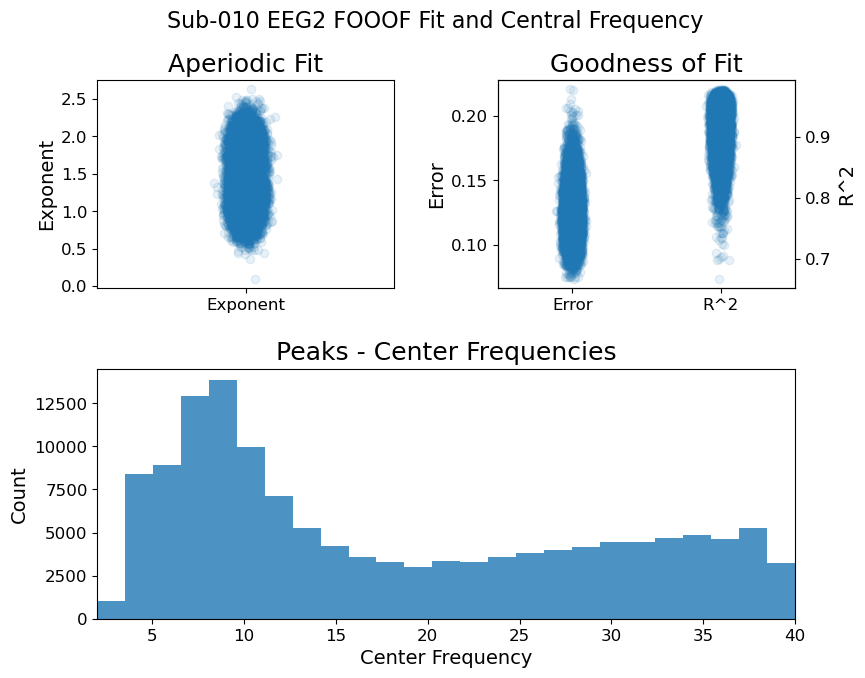

In [ ]:
# Plot using FOOOF
fg_eeg2.plot(
    save_fig=False,  # Don't save yet
    file_name='sub-010_fit_and_cf_0-69h_somno_eeg2.png',
    file_path='Z:/volkan/fooof/figures/goodness_of_fit_and_cf'
)

# Get the current figure and add the title at the top
fig = plt.gcf()  # Get the current figure
fig.suptitle('Sub-010 EEG2 FOOOF Fit and Central Frequency', fontsize=16, )  # Add a title above the subplots

# Adjust layout to make room for the title
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust the figure layout, leaving space at the top for the title

# Save the figure
plt.savefig('Z:/volkan/fooof/figures/goodness_of_fit_and_cf/sub-010_fit_and_cf_0-69h_somno_eeg2.png')


In [24]:
fg_eeg1.save_report('FOOOFGroup_report_sub-010_somno_0-69h_eeg1', file_path='Z:/volkan/fooof/group_report')
fg_eeg2.save_report('FOOOFGroup_report_sub-010_somno_0-69h_eeg2', file_path='Z:/volkan/fooof/group_report')

In [ ]:
# Extract aperiodic parameters
exps_eeg1 = fg_eeg1.get_params('aperiodic_params', 'exponent')
exps_eeg2 = fg_eeg2.get_params('aperiodic_params', 'exponent')c
avg_exps = (exps_eeg1 + exps_eeg2) / 2 # use the average exponent across channels for future analysis


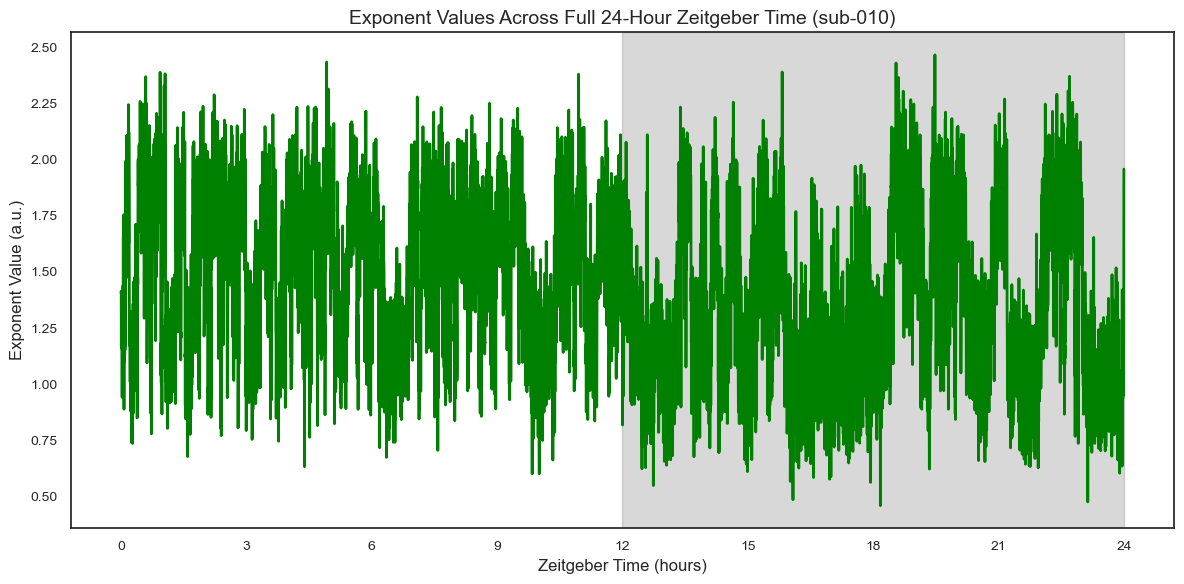

In [19]:
## Plot the exponent over 24 hours in zeitgeber time over the first occurrence of ZT = 0

# Parameters
recording_duration = int(recording_seconds)  # Recording duration in seconds (~69 hours)
zt_start = 9 * 3600  # ZT=0 starts at 09:00 (in seconds since midnight)
zt_end = 21 * 3600 - 1  # ZT=20:59 (in seconds since midnight)
zt_cycle = 24 * 3600  # Full ZT cycle duration in seconds

# Generate synthetic data (replace with actual exponent values)
num_samples = recording_duration // epoch_duration
exponent_values = np.random.random(num_samples)  # Example values

# Convert start time to seconds since midnight
start_hours, start_minutes = map(int, start_time.split(':'))
start_time_seconds = start_hours * 3600 + start_minutes * 60

# Compute timestamps for each sample
timestamps = np.arange(start_time_seconds, start_time_seconds + recording_duration, epoch_duration)

# Determine ZT range based on the first occurrence of ZT=0
if start_time_seconds > zt_start:
    # Adjust start to the next 24-hour cycle
    first_zt_start = ((start_time_seconds - zt_start) // zt_cycle + 1) * zt_cycle + zt_start
else:
    # Use the current day if starting earlier
    first_zt_start = zt_start

first_zt_end = first_zt_start + zt_cycle  # End 24 hours after the first ZT start

# Mask to filter values within the adjusted 24-hour ZT cycle
valid_mask = (timestamps >= first_zt_start) & (timestamps <= first_zt_end)

# Filter data
filtered_exponents = avg_exps[valid_mask]
filtered_zt_timestamps = timestamps[valid_mask] - first_zt_start  # Relative to first ZT start
filtered_zt_hours = filtered_zt_timestamps / 3600  # Convert to hours

# Set Seaborn style
sns.set_theme(style="white")

# Plot
plt.figure(figsize=(12, 6))
sns.lineplot(x=filtered_zt_hours, y=filtered_exponents, color="green", linewidth=2)

# Add shaded region for ZT=12-24
plt.axvspan(12, 24, color='gray', alpha=0.3, label="ZT=12-24 Shaded")

# Customize labels, title, and legend
plt.xlabel("Zeitgeber Time (hours)", fontsize=12)
plt.ylabel("Exponent Value (a.u.)", fontsize=12)
plt.title("Exponent Values Across Full 24-Hour Zeitgeber Time (sub-010)", fontsize=14)
plt.xticks(np.arange(0, 25, 3), fontsize=10)  # Tick marks every 3 hours
plt.yticks(fontsize=10)

# Tight layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()


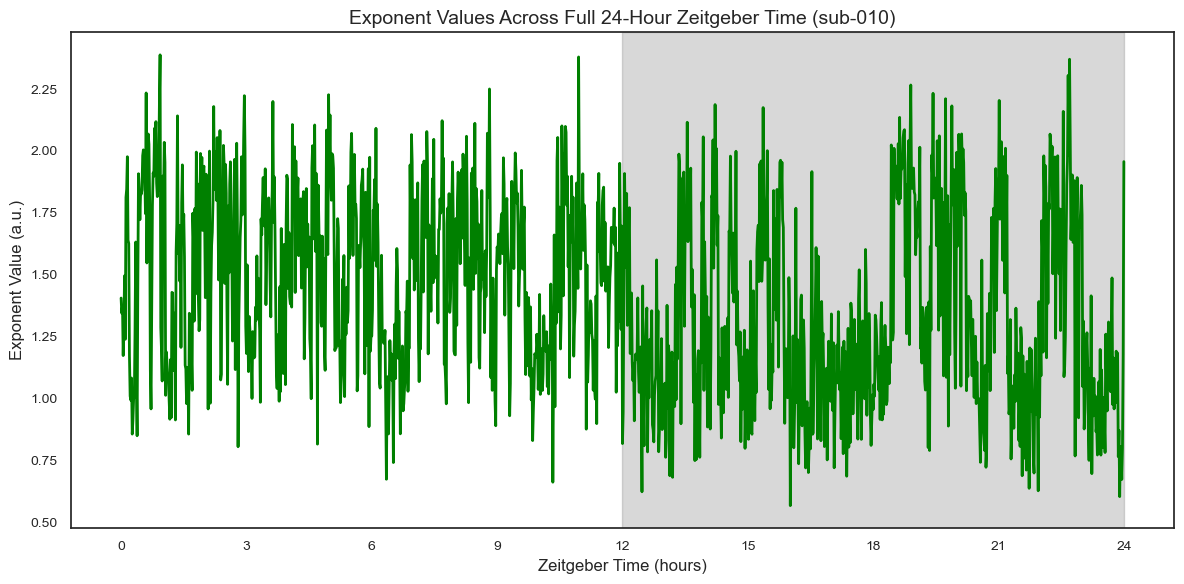

In [21]:
## Plot the exponent over 24 hours in zeitgeber time over the first occurrence of ZT = 0 (downsclaed by factor 6)

# Parameters
recording_duration = int(recording_seconds)  # Recording duration in seconds (~69 hours)
zt_start = 9 * 3600  # ZT=0 starts at 09:00 (in seconds since midnight)
zt_end = 21 * 3600 - 1  # ZT=20:59 (in seconds since midnight)
zt_cycle = 24 * 3600  # Full ZT cycle duration in seconds

# Generate synthetic data (replace with actual exponent values)
num_samples = recording_duration // epoch_duration
exponent_values = np.random.random(num_samples)  # Example values

# Convert start time to seconds since midnight
start_hours, start_minutes = map(int, start_time.split(':'))
start_time_seconds = start_hours * 3600 + start_minutes * 60

# Compute timestamps for each sample
timestamps = np.arange(start_time_seconds, start_time_seconds + recording_duration, epoch_duration)

# Determine ZT range based on the first occurrence of ZT=0
if start_time_seconds > zt_start:
    # Adjust start to the next 24-hour cycle
    first_zt_start = ((start_time_seconds - zt_start) // zt_cycle + 1) * zt_cycle + zt_start
else:
    # Use the current day if starting earlier
    first_zt_start = zt_start

first_zt_end = first_zt_start + zt_cycle  # End 24 hours after the first ZT start

# Mask to filter values within the adjusted 24-hour ZT cycle
valid_mask = (timestamps >= first_zt_start) & (timestamps <= first_zt_end)

# Filter data
filtered_exponents = avg_exps[valid_mask]
filtered_zt_timestamps = timestamps[valid_mask] - first_zt_start  # Relative to first ZT start
filtered_zt_hours = filtered_zt_timestamps / 3600  # Convert to hours

# Reduce sampling rate by 1/6th - to get every minute rather than every 10 seconds
reduced_exponents = filtered_exponents[::6]
reduced_zt_hours = filtered_zt_hours[::6]


# Set Seaborn style
sns.set_theme(style="white")

# Plot
plt.figure(figsize=(12, 6))
sns.lineplot(x=reduced_zt_hours, y=reduced_exponents, color="green", linewidth=2)

# Add shaded region for ZT=12-24
plt.axvspan(12, 24, color='gray', alpha=0.3, label="ZT=12-24 Shaded")

# Customize labels, title, and legend
plt.xlabel("Zeitgeber Time (hours)", fontsize=12)
plt.ylabel("Exponent Value (a.u.)", fontsize=12)
plt.title("Exponent Values Across Full 24-Hour Zeitgeber Time (sub-010)", fontsize=14)
plt.xticks(np.arange(0, 25, 3), fontsize=10)  # Tick marks every 3 hours
plt.yticks(fontsize=10)

# Tight layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

In [60]:
# Upload somnotate scoring with sleepStage and Timestamp columns
somno_scoring = pd.read_csv("Z:/somnotate/to_score_set/vis_back_to_csv/automated_state_annotationoutput_sub-010_ses-01_recording-01_time-0-69h.csv")

In [ ]:
## Convert somno scoring into value for every second

df = somno_scoring

# Ensure the Timestamp column is in datetime format
df["Timestamp"] = pd.to_datetime(df["Timestamp"])

# Define the expected range of timestamps (1 Hz for the entire duration)
start_time_data = df["Timestamp"].iloc[0]
end_time = start_time_data + pd.Timedelta(seconds=recording_duration) - pd.Timedelta(seconds=1)  # Exclude the last second
expected_timestamps = pd.date_range(start=start_time_data, end=end_time, freq="1S")

# Convert timestamps to seconds relative to the first timestamp
df["second"] = (df["Timestamp"] - start_time_data).dt.total_seconds().astype(int)

# Downsample by taking the mode of sleepStage and the first timestamp in each second
downsampled_df = df.groupby("second").agg({
    "Timestamp": "first",  # Take the first timestamp in each group
    "sleepStage": lambda x: x.mode().iloc[0]  # Take the most frequent sleep stage in each second
}).reset_index(drop=True)

# Round the Timestamp column to the nearest second
downsampled_df["Timestamp"] = downsampled_df["Timestamp"].dt.round("S")

# Reindex to align with the expected timestamps
downsampled_df = downsampled_df.set_index("Timestamp")
downsampled_df = downsampled_df.reindex(expected_timestamps)
downsampled_df = downsampled_df.reset_index().rename(columns={"index": "Timestamp"})

# Fill in missing sleepStage values if necessary
downsampled_df["sleepStage"] = downsampled_df["sleepStage"].fillna(method="ffill").fillna(method="bfill")

# Ensure sleepStage is an integer (whole number)
downsampled_df["sleepStage"] = downsampled_df["sleepStage"].astype(int)

# Round the Timestamp column to the nearest 10 seconds
#downsampled_df["Timestamp"] = downsampled_df["Timestamp"].dt.round("10S")

# Result
print(downsampled_df)
print(f"Expected rows: {len(expected_timestamps)}, Actual rows: {len(downsampled_df)}")

C:\Users\harrislab\AppData\Local\Temp\ipykernel_12644\825506926.py:11: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  expected_timestamps = pd.date_range(start=start_time_data, end=end_time, freq="1S")


                 Timestamp  sleepStage
0      2024-09-16 16:01:49           2
1      2024-09-16 16:01:50           2
2      2024-09-16 16:01:51           2
3      2024-09-16 16:01:52           2
4      2024-09-16 16:01:53           2
...                    ...         ...
250715 2024-09-19 13:40:24           2
250716 2024-09-19 13:40:25           2
250717 2024-09-19 13:40:26           2
250718 2024-09-19 13:40:27           2
250719 2024-09-19 13:40:28           2

[250720 rows x 2 columns]
Expected rows: 250720, Actual rows: 250720


C:\Users\harrislab\AppData\Local\Temp\ipykernel_12644\825506926.py:23: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  downsampled_df["Timestamp"] = downsampled_df["Timestamp"].dt.round("S")
C:\Users\harrislab\AppData\Local\Temp\ipykernel_12644\825506926.py:31: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  downsampled_df["sleepStage"] = downsampled_df["sleepStage"].fillna(method="ffill").fillna(method="bfill")


In [108]:
## Convert downsample_df to epoch_duration for exponent analysis

# Group by every 'epoch_duration' rows
grouped = (
    downsampled_df.groupby(downsampled_df.index // epoch_duration)  # Create groups of `epoch_duration` rows
    .agg({
        "Timestamp": "first",  # Take the value at the start of the epoch for Timestamp
        "sleepStage": lambda x: x.mode().iloc[0] if not x.mode().empty else None  # Take the mode for sleepStage
    })
)

# Reset index for a clean output
subset_df = grouped.reset_index(drop=True)

# Round the Timestamp column to the nearest 10 seconds
subset_df["Timestamp"] = subset_df["Timestamp"].dt.round("10S")

# Display the resulting DataFrame
print(subset_df.head())

            Timestamp  sleepStage
0 2024-09-16 16:01:50           2
1 2024-09-16 16:02:00           2
2 2024-09-16 16:02:10           2
3 2024-09-16 16:02:20           2
4 2024-09-16 16:02:30           1


C:\Users\harrislab\AppData\Local\Temp\ipykernel_12644\858379166.py:16: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  subset_df["Timestamp"] = subset_df["Timestamp"].dt.round("10S")


In [109]:
## Insert ZT as column

# Define ZT=0 as 09:00:00 on the first day
start_zt = pd.to_datetime(f"{subset_df['Timestamp'].iloc[0].date()} 09:00:00")

# Calculate Zeitgeber Time (ZT), where ZT=0 corresponds to 21:00:00
subset_df["ZT"] = (subset_df["Timestamp"] - start_zt).dt.total_seconds() / 3600  # Convert seconds to hours

# Adjust ZT to be between 0 and 24 hours (wrap around after 24 hours)
subset_df["ZT"] = subset_df["ZT"] % 24

# Resulting DataFrame
print(subset_df.head())

            Timestamp  sleepStage        ZT
0 2024-09-16 16:01:50           2  7.030556
1 2024-09-16 16:02:00           2  7.033333
2 2024-09-16 16:02:10           2  7.036111
3 2024-09-16 16:02:20           2  7.038889
4 2024-09-16 16:02:30           1  7.041667


In [110]:
# Ensure the length of subset_df and avg_exps are the same before proceeding
if len(subset_df) != len(avg_exps):
    raise ValueError(f"Length mismatch: subset_df has {len(subset_df)} rows, but avg_exps has {len(avg_exps)} values.")

# If the lengths match, add avg_exps as a new column
subset_df["avg_exps"] = avg_exps

In [111]:
print(subset_df)

                Timestamp  sleepStage        ZT  avg_exps
0     2024-09-16 16:01:50           2  7.030556  0.768540
1     2024-09-16 16:02:00           2  7.033333  1.140381
2     2024-09-16 16:02:10           2  7.036111  1.150311
3     2024-09-16 16:02:20           2  7.038889  1.076903
4     2024-09-16 16:02:30           1  7.041667  0.931240
...                   ...         ...       ...       ...
25067 2024-09-19 13:39:40           1  4.661111  1.338163
25068 2024-09-19 13:39:50           1  4.663889  1.309692
25069 2024-09-19 13:40:00           1  4.666667  1.227367
25070 2024-09-19 13:40:10           2  4.669444  1.266238
25071 2024-09-19 13:40:20           2  4.672222  1.597774

[25072 rows x 4 columns]


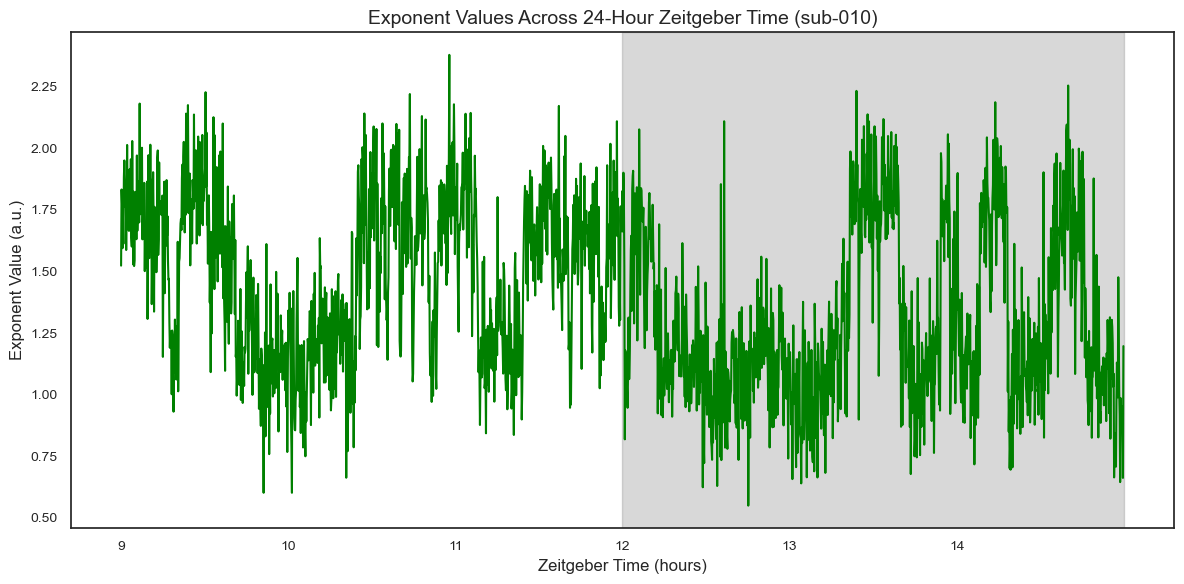

In [165]:
## Plot exponent for 24 hours

# Find the first occurrence of ZT=0
zt_zero_start_idx = subset_df[subset_df["ZT"] == 9].index[1]

# Find the second occurrence of ZT=0 (next day)
zt_zero_end_idx = subset_df[subset_df["ZT"] == 15].index[1]

# Filter subset_df to include only data between the first and second occurrence of ZT=0
filtered_subset_df = subset_df.iloc[zt_zero_start_idx:zt_zero_end_idx]

# Plot the data
plt.figure(figsize=(12, 6))

# Set Seaborn style
sns.set_theme(style="white")

# Plot the original avg_exps
sns.lineplot(x=filtered_subset_df["ZT"], y=filtered_subset_df["avg_exps"], color="green")

# Add shaded region for ZT=12-24
plt.axvspan(12, 15, color='gray', alpha=0.3, label="ZT=12-24 Shaded")

# Customize labels, title, and legend
plt.xlabel("Zeitgeber Time (hours)", fontsize=12)
plt.ylabel("Exponent Value (a.u.)", fontsize=12)
plt.title("Exponent Values Across 24-Hour Zeitgeber Time (sub-010)", fontsize=14)
plt.xticks(np.arange(9, 15, 1), fontsize=10)  # Tick marks every 3 hours
plt.yticks(fontsize=10)

# Tight layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()


C:\Users\harrislab\AppData\Local\Temp\ipykernel_12644\1387092281.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_subset_df['rolling_avg'] = filtered_subset_df['avg_exps'].rolling(window=window_size).mean()


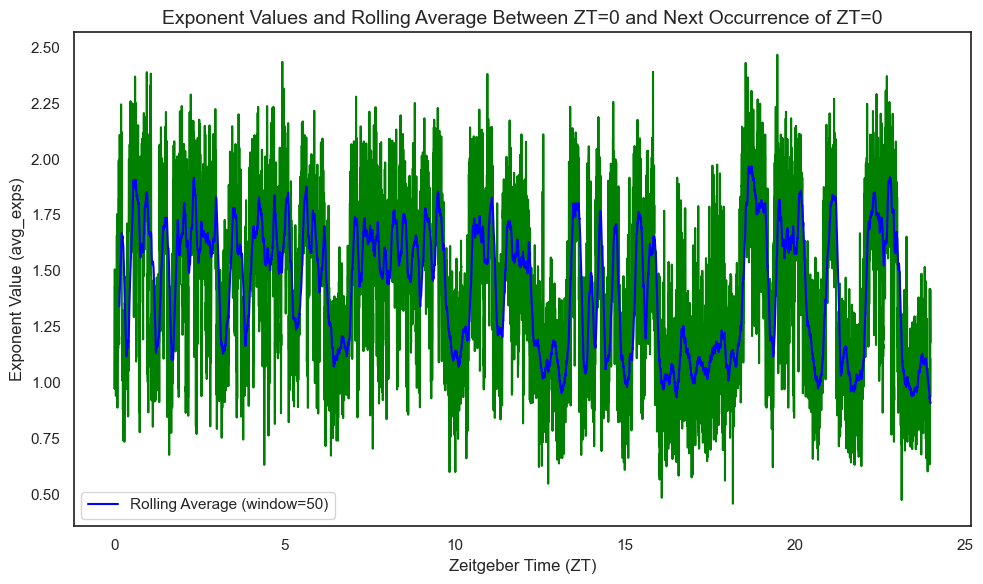

In [ ]:
# Plot exponent with a rolling average

# Calculate the rolling average of avg_exps with a window size (e.g., 10 data points)
window_size = 50
filtered_subset_df['rolling_avg'] = filtered_subset_df['avg_exps'].rolling(window=window_size).mean()

# Plot the data
plt.figure(figsize=(10, 6))

# Plot the original avg_exps
sns.lineplot(x=filtered_subset_df["ZT"], y=filtered_subset_df["avg_exps"], color="green")

# Plot the rolling average
sns.lineplot(x=filtered_subset_df["ZT"], y=filtered_subset_df["rolling_avg"], color="blue", label=f"Rolling Average (window={window_size})")

plt.xlabel("Zeitgeber Time (ZT)", fontsize=12)
plt.ylabel("Exponent Value (avg_exps)", fontsize=12)
plt.title("Exponent Values and Rolling Average Between ZT=0 and Next Occurrence of ZT=0", fontsize=14)

# Optionally, shade the background for specific sleep stages if needed
# (e.g., sleepStage 2 or 3 for REM or NREM stages)

# Show legend
plt.legend()

plt.tight_layout()
plt.show()


C:\Users\harrislab\AppData\Local\Temp\ipykernel_12644\285609172.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_subset_df['rolling_avg'] = filtered_subset_df['avg_exps'].rolling(window=window_size).mean()


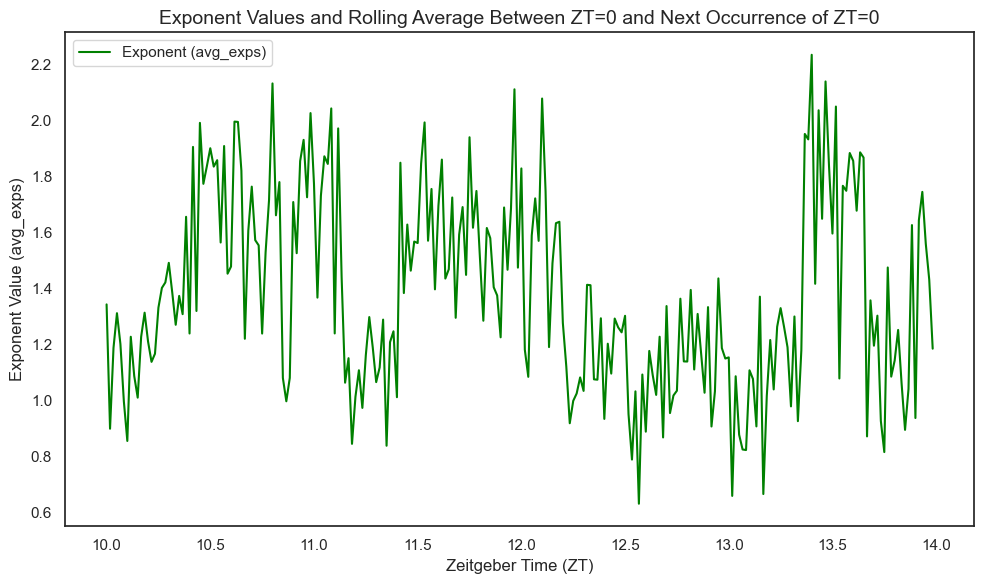

In [137]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the rolling average of avg_exps with a window size (e.g., 10 data points)
window_size = 10
filtered_subset_df['rolling_avg'] = filtered_subset_df['avg_exps'].rolling(window=window_size).mean()

# Select every 6th row from filtered_subset_df
subset_every_6th_row = filtered_subset_df.iloc[::6]  # This selects every 6th row

# Plot the data
plt.figure(figsize=(10, 6))

# Plot the original avg_exps for every 6th row
sns.lineplot(x=subset_every_6th_row["ZT"], y=subset_every_6th_row["avg_exps"], color="green", label="Exponent (avg_exps)")

# Plot the rolling average for every 6th row
#sns.lineplot(x=subset_every_6th_row["ZT"], y=subset_every_6th_row["rolling_avg"], color="blue", label=f"Rolling Average (window={window_size})")

plt.xlabel("Zeitgeber Time (ZT)", fontsize=12)
plt.ylabel("Exponent Value (avg_exps)", fontsize=12)
plt.title("Exponent Values and Rolling Average Between ZT=0 and Next Occurrence of ZT=0", fontsize=14)

# Optionally, shade the background for specific sleep stages if needed
# (e.g., sleepStage 2 or 3 for REM or NREM stages)

# Show legend
plt.legend()

plt.tight_layout()
plt.show()


C:\Users\harrislab\AppData\Local\Temp\ipykernel_12644\1432650976.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_subset_df['rolling_avg'] = filtered_subset_df['avg_exps'].rolling(window=window_size).mean()


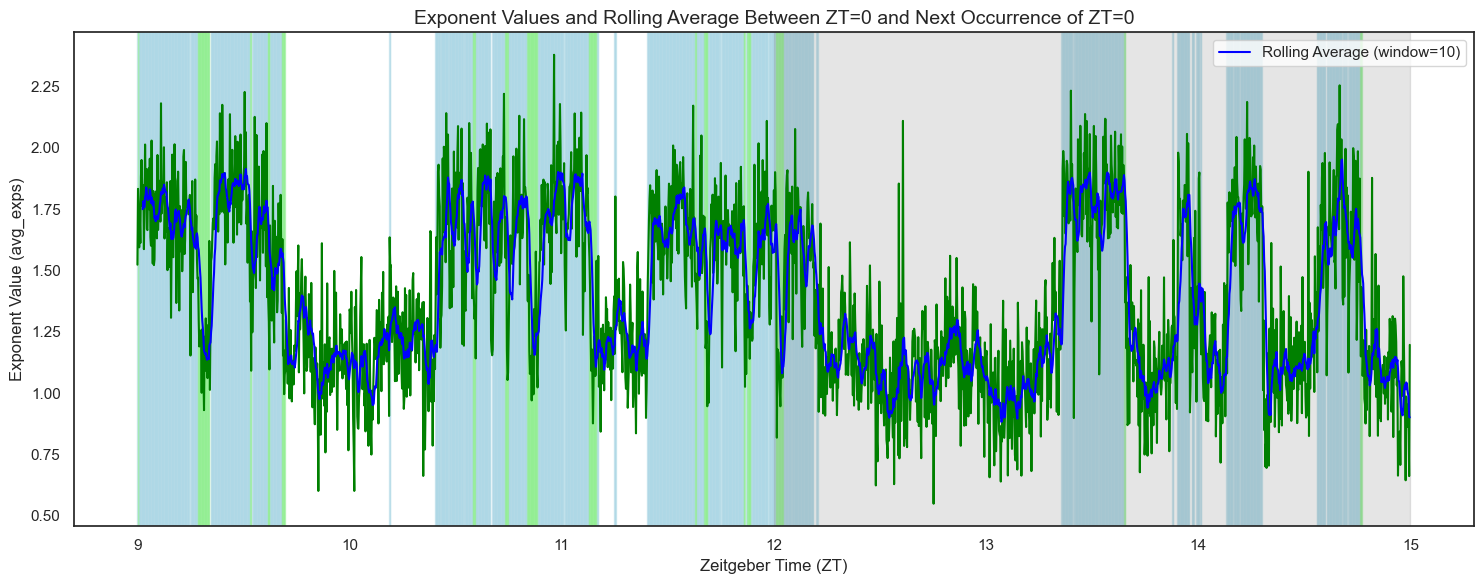

In [172]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the rolling average of avg_exps with a window size (e.g., 10 data points)
window_size = 10
filtered_subset_df['rolling_avg'] = filtered_subset_df['avg_exps'].rolling(window=window_size).mean()

# Plot the data
plt.figure(figsize=(15, 6))

# Plot the original avg_exps
sns.lineplot(x=filtered_subset_df["ZT"], y=filtered_subset_df["avg_exps"], color="green")

# Plot the rolling average
sns.lineplot(x=filtered_subset_df["ZT"], y=filtered_subset_df["rolling_avg"], color="blue", label=f"Rolling Average (window={window_size})")

# Shade the background where sleepStage == 2 (light sleep) or sleepStage == 3 (deep sleep)
for i in range(1, len(filtered_subset_df)):
    # Shade light blue for sleepStage 2 (light sleep)
    if filtered_subset_df["sleepStage"].iloc[i] == 2:
        plt.axvspan(filtered_subset_df["ZT"].iloc[i-1], filtered_subset_df["ZT"].iloc[i], color='lightblue', alpha=0.5)  # Light blue
    
    # Shade light green for sleepStage 3 (deep sleep)
    elif filtered_subset_df["sleepStage"].iloc[i] == 3:
        plt.axvspan(filtered_subset_df["ZT"].iloc[i-1], filtered_subset_df["ZT"].iloc[i], color='lightgreen', alpha=0.5)  # Light green

# Add shaded region for ZT=12-24
plt.axvspan(12, 15, color='gray', alpha=0.2)

# Add title and labels
plt.xlabel("Zeitgeber Time (ZT)", fontsize=12)
plt.ylabel("Exponent Value (avg_exps)", fontsize=12)
plt.title("Exponent Values and Rolling Average Between ZT=0 and Next Occurrence of ZT=0", fontsize=14)

# Show legend
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()


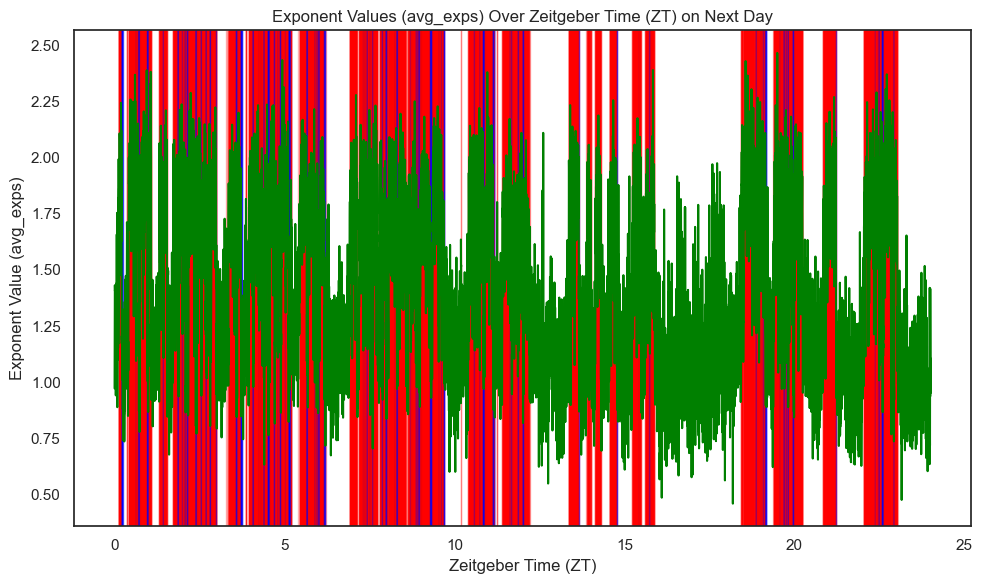

In [103]:
# Plot using seaborn
plt.figure(figsize=(10, 6))

# Loop through sleepStages and shade accordingly
for idx, row in next_day_df.iterrows():
    if row['sleepStage'] == 2:
        plt.axvspan(row['ZT'], row['ZT'], color='red', alpha=0.3)  # Red shading for sleepStage 2
    elif row['sleepStage'] == 3:
        plt.axvspan(row['ZT'], row['ZT'], color='blue', alpha=0.3)  # Blue shading for sleepStage 3

# Plot the line graph for avg_exps
sns.lineplot(data=next_day_df, x="ZT", y="avg_exps", color="green")

# Set plot titles and labels
plt.title("Exponent Values (avg_exps) Over Zeitgeber Time (ZT) on Next Day")
plt.xlabel("Zeitgeber Time (ZT)")
plt.ylabel("Exponent Value (avg_exps)")

# Show the plot
plt.tight_layout()
plt.show()


In [89]:
## Plotting avg_exps across somnotate scoring

# Check if the lengths of `avg_exps` and `subset_df` match
if len(avg_exps) != len(subset_df):
    raise ValueError(
        f"Length mismatch: avg_exps ({len(avg_exps)}) and subset_df ({len(subset_df)}) do not have the same length. "
        "Ensure both are aligned and sampled at the same frequency."
    )
# Ensure that Timestamp is a datetime object
subset_df["Timestamp"] = pd.to_datetime(subset_df["Timestamp"])

# Convert Timestamp to ZT (Zeitgeber Time) based on ZT=0 at 09:00:00
zt_start = pd.to_datetime("09:00:00").normalize()  # Start ZT=0 at 09:00 each day
subset_df["ZT"] = (subset_df["Timestamp"] - zt_start).dt.total_seconds() % 86400  # ZT in seconds

# Find the index of the first occurrence of 09:00 (ZT=0)
zt_zero_start_idx = subset_df[subset_df["Timestamp"].dt.time == pd.to_datetime("09:00:00").time()].index[0]
print(f"First occurrence of ZT=0 found at index {zt_zero_start_idx}.")

# Find the index of the first occurrence closest to 23:59 (ZT ~ 24)
# We will find the closest timestamp to 23:59:00, which is a little before midnight
closest_to_end = pd.to_datetime("23:59:59")
zt_max_idx = subset_df[(subset_df["Timestamp"] - closest_to_end).abs().idxmin()]
print(f"First occurrence closest to 23:59:59 found at index {zt_max_idx}.")

# Filter the DataFrame to only include rows between the closest ZT=0 and ZT closest to 23:59
filtered_df = subset_df.loc[zt_zero_start_idx:zt_max_idx]

# Plot
plt.figure(figsize=(12, 6))
plt.plot(filtered_df['ZT'], filtered_df['avg_exps'], label="Exponent Values", color="green")
plt.axvline(0, color='red', linestyle='--', label="ZT=0 (Start)")
plt.axvline(zt_max_idx, color='blue', linestyle='--', label="ZT ~ 24 (End)")
plt.xlabel("Zeitgeber Time (hours)")
plt.ylabel("Exponent Value")
plt.title("Exponent Values Across ZT 0 to Closest ZT 24")
plt.xticks(np.arange(0, 25, 3))  # Tick marks every 3 hours
plt.legend()
plt.grid(True, alpha=0.3)  # Light grid for better readability
plt.tight_layout()
plt.show()

IndexError: index 0 is out of bounds for axis 0 with size 0

In [46]:
manual_scoring = pd.read_csv('/Volumes/harris/volkan/fooof/sub-010_ses-01_recording-01_first_12hrs-sleepscore_manual.csv')

In [51]:
import pandas as pd
import numpy as np

# Assuming 'df' is your DataFrame

# Extract sleepStage column
sleep_stage_series = manual_scoring['sleepStage']

# Downsample to one value every 10 seconds (512 Hz * 10 seconds = 5120 samples)
downsampled_sleep_stage = sleep_stage_series.groupby(np.arange(len(sleep_stage_series)) // 5120).mean().round().astype(int)

# Convert to DataFrame (optional)
downsampled_sleep_stage_df = downsampled_sleep_stage.to_frame('sleepStage')[:-1]

/var/folders/_n/p_b9638x5g99dbmz8kz99s100000gn/T/ipykernel_12827/3831942711.py:13: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  ax1.plot(pd.date_range(start='16:00', periods=4320, freq='10S'), exps, color='blue')
/var/folders/_n/p_b9638x5g99dbmz8kz99s100000gn/T/ipykernel_12827/3831942711.py:24: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  ax2.plot(pd.date_range(start='16:00', periods=4320, freq='10S'), downsampled_sleep_stage_df, color='red')


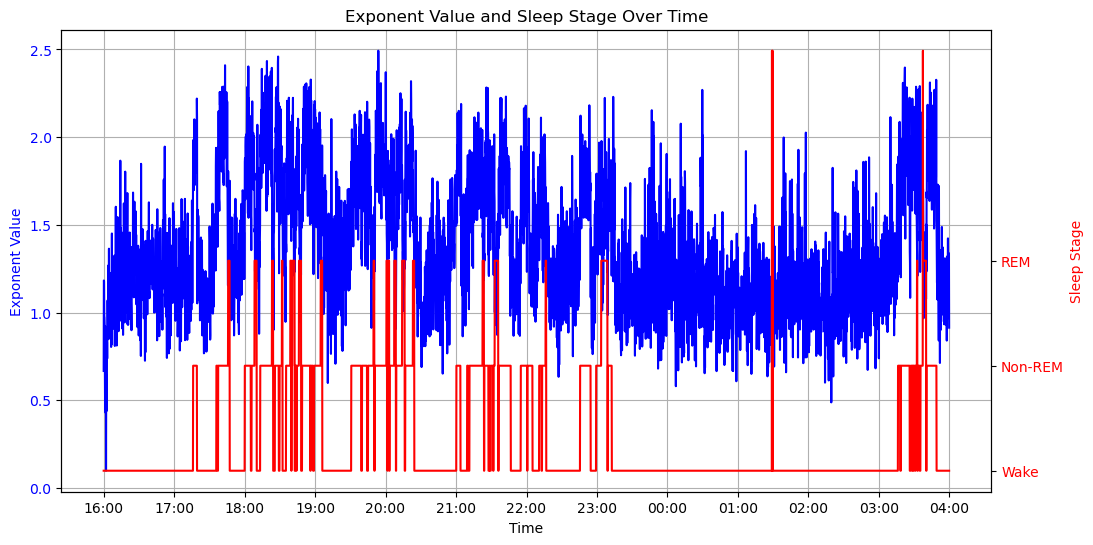

In [53]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.dates as mdates
import pandas as pd

# Calculate time array (43200 seconds, starting at 16:00)
time = np.arange(0, 43200, 10)

# Create plot
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot exponent values
ax1.plot(pd.date_range(start='16:00', periods=4320, freq='10S'), exps, color='blue')
ax1.set_xlabel('Time')
ax1.set_ylabel('Exponent Value', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Format x-axis to display hours
ax1.xaxis.set_major_locator(mdates.HourLocator())
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))

# Plot sleep stage values on secondary y-axis
ax2 = ax1.twinx()
ax2.plot(pd.date_range(start='16:00', periods=4320, freq='10S'), downsampled_sleep_stage_df, color='red')
ax2.set_ylabel('Sleep Stage', color='red')
ax2.tick_params(axis='y', labelcolor='red')
ax2.set_yticks([1, 2, 3])
ax2.set_yticklabels(['Wake', 'Non-REM', 'REM'])

# Show grid
ax1.grid(True)

# Show plot
plt.title('Exponent Value and Sleep Stage Over Time')
plt.show()